# Synthetic Models

In [40]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as pyo
import tikzplotlib

In [2]:
#upload of edgelist of our network in order to retrieve n of nodes/edge
#nodeList = pd.read_csv('data/bd-node.csv')
edgeList = pd.read_csv('data/bd-edge.csv')
g = nx.from_pandas_edgelist(edgeList, 'Source', 'Target', ['Weight'])

In [3]:
#graph components analysis

#list of connected components (for decreasing size)
#the first one is the giant component
compsList = list(nx.connected_components(g))
GC = g.subgraph(compsList[0])

In [4]:
#the following analysis will be done comparing our network with different synthetic models
#our network will be the GC

g=GC

In [5]:
#use the info of our network in order to build new synthetic networks
# with the same n of nodes and edges + av. node degree:

n = g.number_of_nodes()
e = g.number_of_edges()
nx.info(g)

'Graph with 11573 nodes and 987741 edges'

In [11]:
#average degree

avDegree = sum(dict(g.degree()).values())/float(len(g))
avDegree

170.69748552665686

In [142]:
#print degree values w/ occurrence frequency of our network

DegFreq = pd.DataFrame(columns=['Degree Value', 'Node Frequency'])

for count, freq in enumerate(nx.degree_histogram(g)):
    new_row = {'Degree Value':count, 'Node Frequency':freq}
    DegFreq = DegFreq.append(new_row, ignore_index=True)




## 1.Erdős–Rényi model

### Building the synthetic-network

In [6]:
# network generator (random graphs) using the same n of nodes/edges of our network
# edges = p*(n*(n-1))/2

#probability of tracing an edge between 2 nodes
p = (2*e)/(n*(n-1))

er = nx.erdos_renyi_graph(n, p)


In [13]:
#nx.draw(er)

In [14]:
nx.info(er)

'Graph with 11573 nodes and 987681 edges'

### Degree distribution

In [15]:
avDegree = int(sum(dict(er.degree()).values())/float(len(er)))
avDegree

170

In [7]:
#print degree values w/ occurrence frequency in the network

DegFreqER = pd.DataFrame(columns=['Degree Value', 'Node Frequency'])

for count, freq in enumerate(nx.degree_histogram(er)):
    new_row = {'Degree Value':count, 'Node Frequency':freq}
    DegFreqER = DegFreqER.append(new_row, ignore_index=True)

DegFreqER

,Degree Value,Node Frequency
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
221,221,1
222,222,2
223,223,1
224,224,0


In [148]:
#Degree distribution

#distribution per frequency
fig00 = px.histogram(DegFreqER, x="Degree Value", y="Node Frequency", title = 'Frequency distribution of node degree')
fig00.update_layout(bargap=0.3)
fig00.show()

In [149]:
#degree distribution

#linear-scale plot
fig01 = px.scatter(DegFreqER, x="Degree Value", y="Node Frequency", title = 'Degree Distribution [Linear scale]')
fig01.update_layout(xaxis_title="Degree",  yaxis_title="#Nodes")
fig01.show()

In [66]:
#degree distribution

#logaritmic-scale plot
fig02 = px.scatter(DegFreqER, x="Degree Value", y="Node Frequency", title = 'Degree Distribution [Log-log scale]', log_x = True, log_y = True)
fig02.update_layout(xaxis_title="Degree",  yaxis_title="#Nodes")
fig02.update_xaxes(
    range=[0.5, 3],  # sets the range of xaxis
)
fig02.show()

### Paths and Diameter

In [151]:

nx.average_shortest_path_length(er)

2.0651824996791435

In [152]:
#network diameter
nx.diameter(er)

3

### Density and Clustering coefficient

In [153]:
nx.density(er)

0.014732447710380153

In [154]:
#graph transitivity = the fraction of all possible triangles present in g -> 3x(nTriangles)/nTriples
#that is the total number of closed triangle in a network
#it should be the global clustering coefficient
#nx.transitivity(er)

In [155]:
nx.average_clustering(er)

0.014737729697601036

## 2.Watts-Strogatz model

### Building the synthetic-network

#### 1. Regular lattice (p = 0)

In [8]:
#in this phase each node has the same degree (because p = 0)

#Each node is joined with its k nearest neighbors in a ring topology
#we use the av.node degree of our network as the k-parameter for the generation of the WS-model
k = int(sum(dict(g.degree()).values())/float(len(g)))

# network generator w/ p= 0
ws1 = nx.watts_strogatz_graph(n, k, p=0)


In [9]:
#nx.draw(ws)

In [10]:
nx.info(ws1)

'Graph with 11573 nodes and 983705 edges'

##### Degree distribution

In [11]:
avDegreeWS1 = sum(dict(ws1.degree()).values())/float(len(ws1))
avDegreeWS1

170.0

In [12]:
#print degree values w/ occurrence frequency in the network

DegFreqWS1 = pd.DataFrame(columns=['Degree Value', 'Node Frequency'])

for count, freq in enumerate(nx.degree_histogram(ws1)):
    new_row = {'Degree Value':count, 'Node Frequency':freq}
    DegFreqWS1 = DegFreqWS1.append(new_row, ignore_index=True)

DegFreqWS1

,Degree Value,Node Frequency
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
166,166,0
167,167,0
168,168,0
169,169,0


In [161]:
#Degree distribution

#distribution per frequency
fig10 = px.histogram(DegFreqWS1, x="Degree Value", y="Node Frequency", title = 'Frequency distribution of node degree')
fig10.update_layout(bargap=0.3)
fig10.show()

In [162]:
#degree distribution

#linear-scale plot
fig11 = px.scatter(DegFreqWS1, x="Degree Value", y="Node Frequency", title = 'Degree Distribution [Linear scale]')
fig11.update_layout(xaxis_title="Degree",  yaxis_title="#Nodes")
fig11.show()

In [67]:
#degree distribution

#logaritmic-scale plot
fig12 = px.scatter(DegFreqWS1, x="Degree Value", y="Node Frequency", title = 'Degree Distribution [Log-log scale]', log_x = True, log_y = True)
fig12.update_layout(xaxis_title="Degree",  yaxis_title="#Nodes")
fig12.update_xaxes(
    range=[0.5, 3],  # sets the range of xaxis
)
fig12.show()

##### Paths and Diameter

In [164]:
nx.average_shortest_path_length(ws1)

34.53577601106118

In [165]:
#network diameter
nx.diameter(ws1)

69

##### Density and Clustering coefficient

In [166]:
nx.density(ws1)

0.014690632561354994

In [167]:
#graph transitivity
#it should be the global clustering coefficient
#nx.transitivity(ws1)

In [168]:
# average clustering coefficient
nx.average_clustering(ws1)

0.7455621301776568

#### 2. Small world regime (0.001 < p < 0.1)

In [13]:
# network generator w/ p=0.05
ws2 = nx.watts_strogatz_graph(n, k, p=0.05)

In [14]:
nx.info(ws2)

'Graph with 11573 nodes and 983705 edges'

##### Degree distribution

In [15]:
avDegreeWS2 = sum(dict(ws2.degree()).values())/float(len(ws2))
avDegreeWS2

170.0

In [16]:
#print degree values w/ occurrence frequency in the network

DegFreqWS2 = pd.DataFrame(columns=['Degree Value', 'Node Frequency'])

for count, freq in enumerate(nx.degree_histogram(ws2)):
    new_row = {'Degree Value':count, 'Node Frequency':freq}
    DegFreqWS2 = DegFreqWS2.append(new_row, ignore_index=True)

DegFreqWS2

,Degree Value,Node Frequency
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
178,178,49
179,179,19
180,180,5
181,181,1


In [173]:
#Degree distribution

#distribution per frequency
fig20 = px.histogram(DegFreqWS2, x="Degree Value", y="Node Frequency", title = 'Frequency distribution of node degree')
fig20.update_layout(bargap=0.3)
fig20.show()

In [174]:
#degree distribution

#linear-scale plot
fig21 = px.scatter(DegFreqWS2, x="Degree Value", y="Node Frequency", title = 'Degree Distribution [Linear scale]')
fig21.update_layout(xaxis_title="Degree",  yaxis_title="#Nodes")
fig21.show()

In [70]:
#degree distribution

#logaritmic-scale plot
fig22 = px.scatter(DegFreqWS2, x="Degree Value", y="Node Frequency", title = 'Degree Distribution [Log-log scale]', log_x = True, log_y = True)
fig22.update_layout(xaxis_title="Degree",  yaxis_title="#Nodes")
fig22.update_xaxes(
    range=[0.9, 2.9],  # sets the range of xaxis
)
fig22.show()

##### Paths and Diameter

In [176]:
nx.average_shortest_path_length(ws2)

2.7440042377861458

In [177]:
#network diameter
nx.diameter(ws2)

3

##### Density and Clustering coefficient

In [178]:
nx.density(ws2)

0.014690632561354994

In [179]:
#graph transitivity
#it should be the global clustering coefficient
#nx.transitivity(ws2)

In [180]:
# average clustering coefficient
nx.average_clustering(ws2)

0.64044410257641

#### 3.Random networks (p=1)

In [17]:
# network generator w/ p = 1

ws3 = nx.watts_strogatz_graph(n, k, p=1)

# p=1 : caos situation --> random network

##### Degree distribution

In [18]:
avDegreeWS3 = sum(dict(ws3.degree()).values()) / float(len(ws3))
avDegreeWS3


170.0

In [19]:
#print degree values w/ occurrence frequency in the network

DegFreqWS3 = pd.DataFrame(columns=['Degree Value', 'Node Frequency'])

for count, freq in enumerate(nx.degree_histogram(ws3)):
    new_row = {'Degree Value': count, 'Node Frequency': freq}
    DegFreqWS3 = DegFreqWS3.append(new_row, ignore_index=True)

DegFreqWS3

,Degree Value,Node Frequency
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
201,201,1
202,202,2
203,203,3
204,204,1


In [184]:
#Degree distribution

#distribution per frequency
fig30 = px.histogram(DegFreqWS3, x="Degree Value", y="Node Frequency", title='Frequency distribution of node degree')
fig30.update_layout(bargap=0.3)
fig30.show()

In [185]:
#degree distribution

#linear-scale plot
fig31 = px.scatter(DegFreqWS3, x="Degree Value", y="Node Frequency", title='Degree Distribution [Linear scale]')
fig31.update_layout(xaxis_title="Degree", yaxis_title="#Nodes")
fig31.show()

In [186]:
#degree distribution

#logaritmic-scale plot
fig32 = px.scatter(DegFreqWS3, x="Degree Value", y="Node Frequency", title='Degree Distribution [Log-log scale]',
                  log_x=True, log_y=True)
fig32.update_layout(xaxis_title="Degree", yaxis_title="#Nodes")
fig32.show()

##### Paths and Diameter

In [187]:
nx.average_shortest_path_length(ws3)


2.0655238905029703

In [188]:
#network diameter
nx.diameter(ws3)

3

##### Density and Clustering coefficient

In [189]:
nx.density(ws3)

0.014690632561354994

In [190]:
#graph transitivity
#it should be the global clustering coefficient
#nx.transitivity(ws3)

In [191]:
# average clustering coefficient
nx.average_clustering(ws3)

0.014600217045926362

## 3.Barabasi-Albert model

### Building the synthetic-network

In [20]:
#A graph of n nodes is grown by attaching new nodes each with m edges that are
# preferentially attached to existing nodes with high degree.

# n_of_edges = m *n_of_nodes
# m = number of links each node establishes once joining the network --> preferential attachment
# --> m = n_of_edges/n_of_nodes
m = int(e/n)
print(f"preferential attachment: {m}")

preferential attachment: 85


In [21]:
#network generator
# (using these values of n and m as parameters, we should create a network w/ the same n_of_nodes/edges of our network)
ba = nx.barabasi_albert_graph(n, m)

In [22]:
nx.info(ba)

'Graph with 11573 nodes and 976480 edges'

In [23]:
#nx.draw(ba)

### Degree distribution

In [24]:
avDegreeBA = sum(dict(ba.degree()).values()) / float(len(ba))
avDegreeBA


168.75140413030329

In [25]:
#print degree values w/ occurrence frequency in the network

DegFreqBA = pd.DataFrame(columns=['Degree Value', 'Node Frequency'])

for count, freq in enumerate(nx.degree_histogram(ba)):
    new_row = {'Degree Value': count, 'Node Frequency': freq}
    DegFreqBA = DegFreqBA.append(new_row, ignore_index=True)

DegFreqBA

,Degree Value,Node Frequency
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1637,1637,0
1638,1638,0
1639,1639,0
1640,1640,0


In [198]:
#Degree distribution

#distribution per frequency
fig40 = px.histogram(DegFreqBA, x="Degree Value", y="Node Frequency", title='Frequency distribution of node degree')
fig40.update_layout(bargap=0.3)
fig40.show()

In [199]:
#degree distribution

#linear-scale plot
fig41 = px.scatter(DegFreqBA, x="Degree Value", y="Node Frequency", title='Degree Distribution [Linear scale]')
fig41.update_layout(xaxis_title="Degree", yaxis_title="#Nodes")
fig41.show()

In [72]:
#degree distribution

#logaritmic-scale plot
fig42 = px.scatter(DegFreqBA, x="Degree Value", y="Node Frequency", title='Degree Distribution [Log-log scale]',
                  log_x=True, log_y=True)
fig42.update_layout(xaxis_title="Degree", yaxis_title="#Nodes")
fig42.update_xaxes(
    range=[0.5, 3.5],  # sets the range of xaxis
)
fig42.show()

### Paths and Diameter

In [201]:
nx.average_shortest_path_length(ba)


2.0805215657300242

In [202]:
#network diameter
nx.diameter(ba)

3

### Density and Clustering coefficient


In [203]:
nx.density(ba)


0.01458273454288829

In [204]:
#graph transitivity
#it should be the global clustering coefficient
#nx.transitivity(ba)

In [205]:
# average clustering coefficient
nx.average_clustering(ba)


0.04541347541684777

## 4.Configuration Model

### Building the synthetic-network

In [26]:
# fitting the degree distribution of the real graph

sequence = [i[1] for i in g.degree()]

In [27]:
#network generator
cm = nx.configuration_model(sequence)

In [28]:
nx.info(cm)

'MultiGraph with 11573 nodes and 987741 edges'

### Degree distribution

In [29]:
avDegreeCM = sum(dict(cm.degree()).values()) / float(len(cm))
avDegreeCM


170.69748552665686

In [30]:
#print degree values w/ occurrence frequency in the network

DegFreqCM = pd.DataFrame(columns=['Degree Value', 'Node Frequency'])

for count, freq in enumerate(nx.degree_histogram(cm)):
    new_row = {'Degree Value': count, 'Node Frequency': freq}
    DegFreqCM = DegFreqCM.append(new_row, ignore_index=True)

DegFreqCM

,Degree Value,Node Frequency
0,0,0
1,1,3
2,2,14
3,3,30
4,4,23
...,...,...
2914,2914,0
2915,2915,0
2916,2916,0
2917,2917,0


In [217]:
#Degree distribution

#distribution per frequency
fig50 = px.histogram(DegFreqCM, x="Degree Value", y="Node Frequency", title='Frequency distribution of node degree')
fig50.update_layout(bargap=0.3)
fig50.show()

In [218]:
#degree distribution

#linear-scale plot
fig51 = px.scatter(DegFreqCM, x="Degree Value", y="Node Frequency", title='Degree Distribution [Linear scale]')
fig51.update_layout(xaxis_title="Degree", yaxis_title="#Nodes")
fig51.show()

In [65]:
#degree distribution

#logaritmic-scale plot
fig52 = px.scatter(DegFreqCM, x="Degree Value", y="Node Frequency", title='Degree Distribution [Log-log scale]',
                  log_x=True, log_y=True)
fig52.update_layout(xaxis_title="Degree", yaxis_title="#Nodes")
fig52.update_xaxes(
    range=[0.5, 3.5],  # sets the range of xaxis
)

fig52.show()

### Paths and Diameter

In [221]:
nx.average_shortest_path_length(cm)


2.2469671995101415

In [222]:
#network diameter
nx.diameter(cm)

4

### Density and Clustering coefficient

In [223]:
nx.density(cm)


0.014750906111878402

In [224]:
#graph transitivity
#it should be the global clustering coefficient
#nx.transitivity(cm)

In [230]:
#change the multigraph into a graph, removing parallel edges
CM = nx.Graph(cm)

In [227]:
CM = CM.remove_edges_from(nx.selfloop_edges(CM))

In [231]:
# average clustering coefficient
nx.average_clustering(CM)


0.05864688386401676

In [232]:
avDegreeCM = sum(dict(CM.degree()).values()) / float(len(CM))
avDegreeCM

165.36524669489327

In [237]:
nx.info(CM)

'Graph with 11573 nodes and 956886 edges'

## Comparison of Degree Distribution among the models

In [134]:
#subplot of all the degree distr. of the synthetic models


figMix = make_subplots(rows=2, cols=3, subplot_titles=("ER", "BA", "CM", "WS1", "WS2", "WS3" ), shared_yaxes=True)

figMix.add_trace(
    go.Scatter(x=DegFreqER["Degree Value"], y=DegFreqER["Node Frequency"], mode="markers"), row=1, col=1)

figMix.add_trace(
    go.Scatter(x=DegFreqBA["Degree Value"], y=DegFreqBA["Node Frequency"], mode="markers"), row=1, col=2)

figMix.add_trace(
    go.Scatter(x=DegFreqCM["Degree Value"], y=DegFreqCM["Node Frequency"], mode="markers"), row=1, col=3)

figMix.add_trace(
    go.Scatter(x=DegFreqWS1["Degree Value"], y=DegFreqWS1["Node Frequency"], mode="markers"), row=2, col=1)

figMix.add_trace(
    go.Scatter(x=DegFreqWS2["Degree Value"], y=DegFreqWS2["Node Frequency"],mode="markers"), row=2, col=2)

figMix.add_trace(
    go.Scatter(x=DegFreqWS3["Degree Value"], y=DegFreqWS2["Node Frequency"], mode="markers"), row=2, col=3)


figMix.update_xaxes(title_text="Degree", type="log", range=[1.5, 2.5], row=1, col=1)
figMix.update_yaxes(title_text="#Nodes", type="log", row=1, col=1)
figMix.update_xaxes( title_text="Degree",type="log", row=1, col=2)
figMix.update_yaxes(type="log", row=1, col=2)
figMix.update_xaxes(title_text="Degree",type="log", row=1, col=3)
figMix.update_yaxes(type="log", row=1, col=3)
figMix.update_xaxes(title_text="Degree",type="log", row=2, col=1)
figMix.update_yaxes(title_text="#Nodes",type="log", row=2, col=1)
figMix.update_xaxes(title_text="Degree",type="log",range=[1.5, 2.5], row=2, col=2)
figMix.update_yaxes( type="log", row=2, col=2)
figMix.update_xaxes(title_text="Degree",type="log",range=[1.5, 2.5],  row=2, col=3)
figMix.update_yaxes(type="log", row=2, col=3)


figMix.update_layout(height=700, width=900, showlegend=False) #,title_text="Degree Distribution of the synthetic graphs [Log-log scale]", )

figMix.show()



In [128]:
#open a web page that shows the subplot and it allows to save it as png
pyo.plot(figMix)

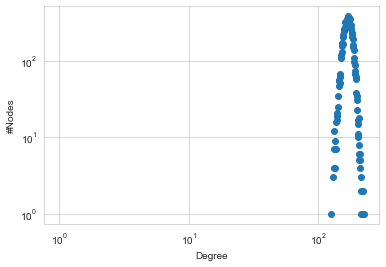

In [41]:
# ER degree distribution with matplot lib
plt.scatter(DegFreqER["Degree Value"], DegFreqER["Node Frequency"])
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

tikzplotlib.save("plots/DegDistributionER.tex")
plt.show()

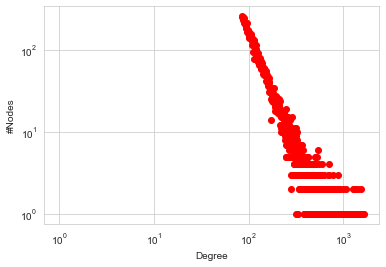

In [46]:
# BA degree distribution with matplot lib
plt.scatter(DegFreqBA["Degree Value"], DegFreqBA["Node Frequency"], c = 'red')
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

tikzplotlib.save("plots/DegDistributionBA.tex")
plt.show()

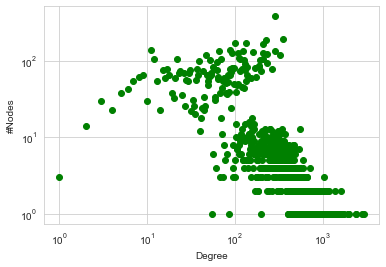

In [47]:
# CM degree distribution with matplot lib
plt.scatter(DegFreqCM["Degree Value"], DegFreqCM["Node Frequency"], c = 'green')
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

tikzplotlib.save("plots/DegDistributionCM.tex")
plt.show()

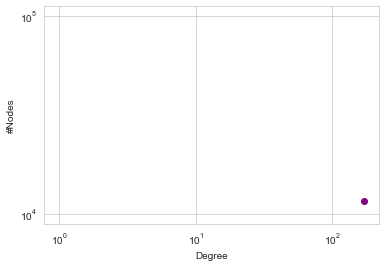

In [54]:
# WS1 degree distribution with matplot lib
plt.scatter(DegFreqWS1["Degree Value"], DegFreqWS1["Node Frequency"], c = 'purple')
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

tikzplotlib.save("plots/DegDistributionWS1.tex")
plt.show()

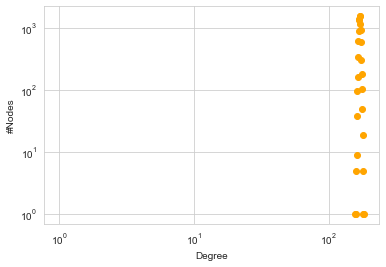

In [50]:
# WS2 degree distribution with matplot lib
plt.scatter(DegFreqWS2["Degree Value"], DegFreqWS2["Node Frequency"], c = 'orange')
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

tikzplotlib.save("plots/DegDistributionWS2.tex")
plt.show()

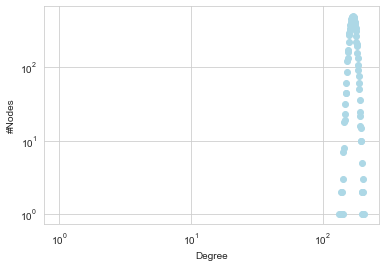

In [56]:
# WS3 degree distribution with matplot lib
plt.scatter(DegFreqWS3["Degree Value"], DegFreqWS3["Node Frequency"], c = 'lightblue')
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

tikzplotlib.save("plots/DegDistributionWS3.tex")
plt.show()